# Social Media Engagement Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
social = pd.read_csv(r'data\social media interactions.csv')
df = social.copy()
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


## Exploratory data analysis

In [3]:
df.shape

(7050, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

Check for `missing` values in dataset

In [5]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

There are 4 redundant columns in the dataset. I will drop them before proceeding further.

In [6]:
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


Check for `duplicate` rows in dataset

In [8]:
df.duplicated().sum()

51

I will delete the duplicate rows.

In [9]:
df.drop_duplicates(inplace=True)

`Data Summary`

In [10]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000,6999.000000
mean,224.994571,225.552079,40.258608,209.946707,12.751536,1.252893,0.697957,0.232605,0.110159
std,452.880746,892.743010,132.046903,439.550330,40.106872,8.725551,3.970912,1.481105,0.688582
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,4.000000,0.000000,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,216.000000,22.000000,4.000000,182.000000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


There are 3 categorical variables in the dataset. I will explore them one by one.

In [11]:
print(f"Number of unique users who interacted: {len(df['status_id'].unique())}")
print(f"Number of unique times of when someone interacted: {len(df['status_published'].unique())}")
print(f"The types of people's posts are {', '.join(map(str, df['status_type'].unique()))}.")
print(f"Number of types of posts that people are making: {len(df['status_type'].unique())}")

Number of unique users who interacted: 6997
Number of unique times of when someone interacted: 6913
The types of people's posts are video, photo, link, status.
Number of types of posts that people are making: 4


I will drop `status_id` because its just an unique identifier of the social media users. Also for now I will drop `status_published` having date and time components since I am not treating the data as a time series data, thus I cannot use it directly for making the model. Later on I might perform certain feature engineering techniques on it to separate certain information such as days or months from it if required later. The variable `status_type` is relevant to the model since it gives the type of post people are making, so I will keep it.

In [12]:
df.drop(['status_id', 'status_published'], axis=1, inplace=True)

## Interactions Analysis

I will investigate the distribution of different reactions (likes, loves, wows, hahas, sads, angrys) and understand which emotions are most prevalent among users.

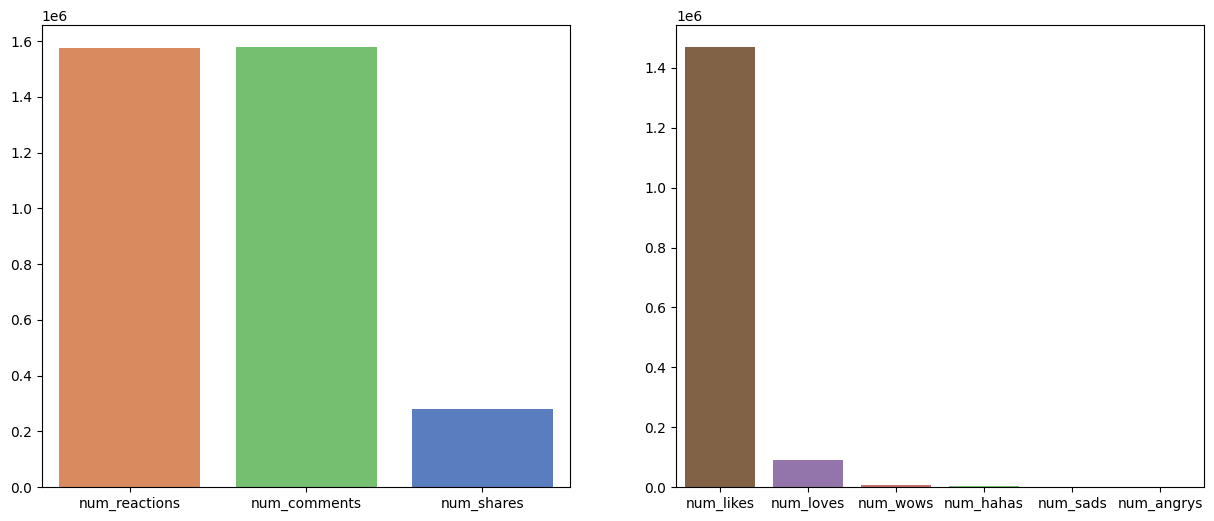

In [13]:
interactions = df[["num_reactions", "num_comments", "num_shares"]].sum()
react_types = df[["num_likes", "num_loves", "num_wows", "num_hahas", "num_sads", "num_angrys"]].sum()

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

sns.barplot(x=interactions.index, y=interactions, hue=interactions, palette="muted", legend=False, ax=ax1)
sns.barplot(x=react_types.index, y=react_types, hue=react_types, palette="muted", legend=False, ax=ax2)

ax1.set_xlabel('')
ax1.set_ylabel('')
ax2.set_xlabel('')
ax2.set_ylabel('')

plt.show()

## Status type analysis

In [14]:
type = df["status_type"].value_counts()
type

status_type
photo     4244
video     2333
status     359
link        63
Name: count, dtype: int64

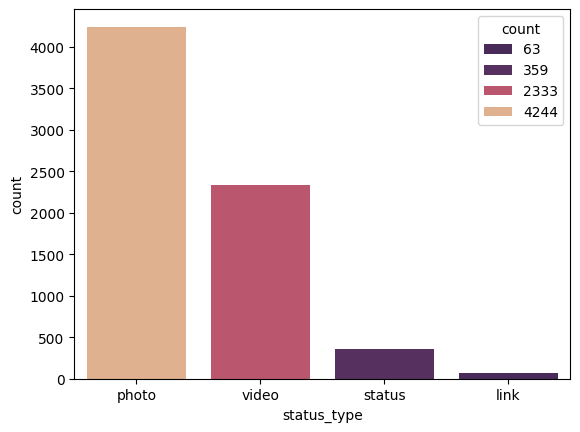

In [15]:
sns.barplot(x=type.index, y=type, hue=type, palette="flare_r")
plt.show()

The number of shares is considerably lower than reactions and comments. The domain reaction type is likes over any other types like loves, wows etc.

## Encoding

In [16]:
X = df.copy(deep=True)
y = df['status_type']

In [17]:
le = LabelEncoder()
X['status_type'] = le.fit_transform(X['status_type'])
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


## Feature Scaling

In [18]:
cols = df.columns

ms = MinMaxScaler()

X = pd.DataFrame(ms.fit_transform(X), columns=[cols])
X

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
6994,0.333333,0.018896,0.000000,0.000000,0.018896,0.000000,0.000000,0.000000,0.000000,0.0
6995,0.333333,0.003397,0.000000,0.000000,0.002972,0.001522,0.000000,0.006369,0.000000,0.0
6996,0.333333,0.000425,0.000000,0.000000,0.000212,0.001522,0.000000,0.000000,0.000000,0.0
6997,0.333333,0.074522,0.000572,0.006425,0.074098,0.003044,0.000000,0.000000,0.000000,0.0


## K-Means model with two clusters

**K-Means clustering** is the most popular unsupervised machine learning algorithm, used to find intrinsic groups or clusters within the unlabelled dataset. It minimizes a criterion called as **inertia**, or WCSS (within-cluster sum-of-squares) which can be recognized as a performance metric, quantifying how internally coherent clusters are.

In [19]:
kmeans = KMeans(n_clusters=2, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

In [20]:
kmeans.cluster_centers_

array([[3.28457550e-01, 3.72026085e-02, 7.30466032e-04, 7.35802291e-04,
        3.67138471e-02, 2.03802595e-03, 2.20070055e-03, 1.17568941e-03,
        2.44016808e-03, 1.26575642e-03],
       [9.55547301e-01, 6.46758659e-02, 2.67693099e-02, 2.93921024e-02,
        5.71514088e-02, 4.72005672e-02, 8.19641464e-03, 9.67717512e-03,
        7.95385019e-03, 7.21372765e-03]])

In [21]:
print(f"The number of features = {kmeans.cluster_centers_.shape[1]} and number of clusters = {kmeans.cluster_centers_.shape[0]}")
print(f"Each centroid is positioned in {kmeans.cluster_centers_.shape[1]}-dimentional feature space!")

The number of features = 10 and number of clusters = 2
Each centroid is positioned in 10-dimentional feature space!


### Inertia

In [22]:
kmeans.inertia_

228.8907492806654

The model is showing very high inertia, it is not a good model fit to the data. In this case lower is better,zero being optimal.

In [23]:
kmeans.labels_   # see which instances is assigned to which cluster label

array([1, 0, 1, ..., 0, 0, 0])

In [24]:
np.unique(kmeans.labels_)

array([0, 1])

In [25]:
kmeans.labels_.shape   # number of training instances

(6999,)

### Elbow Curve
The elbow curve determines the optimal number of clusters for a given dataset by plotting the number of clusters (K) against the corresponding WCSS. Inertia or within-cluster sum of squares (WCSS) represents the sum of squared distances between each data point and its nearest centroid within the cluster. The "elbow" in the curve represents a point where the rate of decrease in WCSS slows down significantly. This point indicates an optimal number of clusters, as adding more clusters beyond this point does not significantly reduce WCSS.

,k,inertia
0,1,888.422105
1,2,228.890749
2,3,157.387710
3,4,123.346770
4,5,93.014181
5,6,79.229470
6,7,70.013708
7,8,64.130072
8,9,59.463776
9,10,54.104351


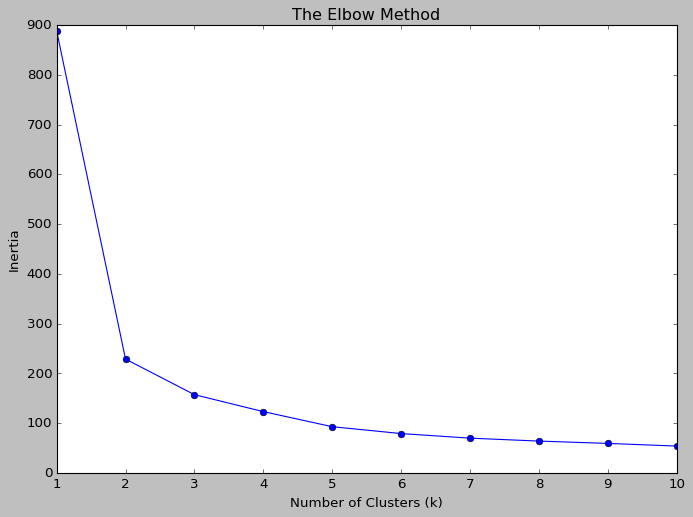

In [26]:
inertia_data = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    inertia_data.append({'k': k, 'inertia': inertia})

inertia_df = pd.DataFrame(inertia_data)

display(inertia_df)

plt.style.use("classic")
plt.figure(figsize=(10,7))
plt.plot(inertia_df['k'], inertia_df['inertia'], marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

Here's a brief interpretation based on the inertia values:

- k = 1: High inertia, all points are in one cluster.
- k = 2: Significant decrease in inertia, but the decrease becomes less pronounced as k increases.
- k = 3 or 4: There is still a decrease, but it's less prominent than for k = 2.

Therefore; from the Elbow curve k=4 seems right for this data. Now lets see some other metrics as well.

### Calinski-Harabasz Index

The Calinski-Harabasz index, also known as the Variance Ratio Criterion, measures the ratio of between-cluster variance to within-cluster variance. Higher values indicate better-defined clusters.

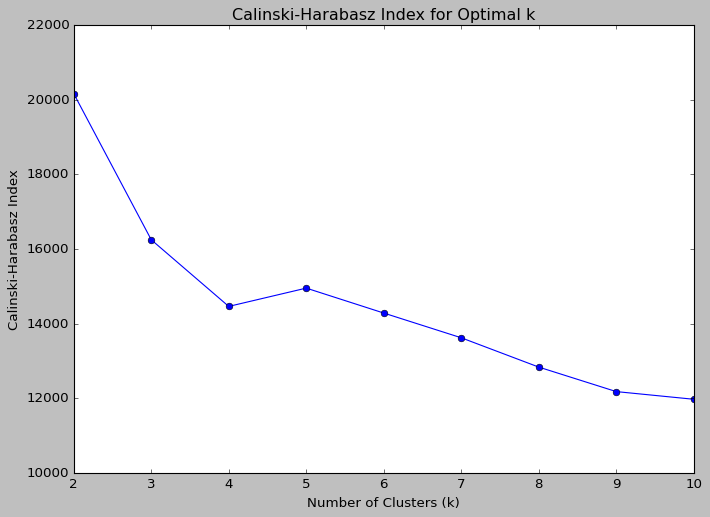

In [27]:
from sklearn.metrics import calinski_harabasz_score

ch_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    ch_scores.append(calinski_harabasz_score(X, kmeans.labels_))

plt.figure(figsize=(10,7))
plt.plot(range(2, 11), ch_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for Optimal k')
plt.show()

### Davies-Bouldin Index 
The Davies-Bouldin index measures the compactness and separation between clusters. A lower value indicates better clustering.

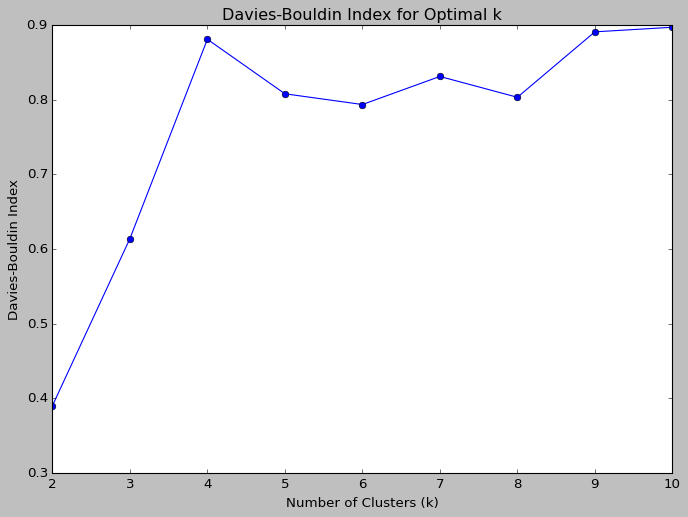

In [28]:
from sklearn.metrics import davies_bouldin_score

db_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    db_scores.append(davies_bouldin_score(X, kmeans.labels_))

# Plot Davies-Bouldin index
plt.figure(figsize=(10,7))
plt.plot(range(2, 11), db_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index for Optimal k')
plt.show()

### Silhouette Score
The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette score ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

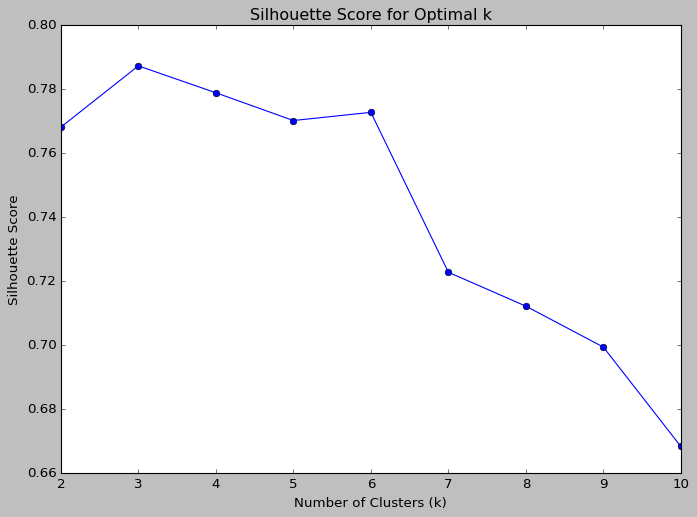

In [29]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10,7))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()

After evaluating all the metrics, I have decided to go with K=4

## K-Means model with four clusters

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0) 
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [31]:
kmeans.inertia_

123.34676988899828

### Visualizing the clusters in reduced feature space

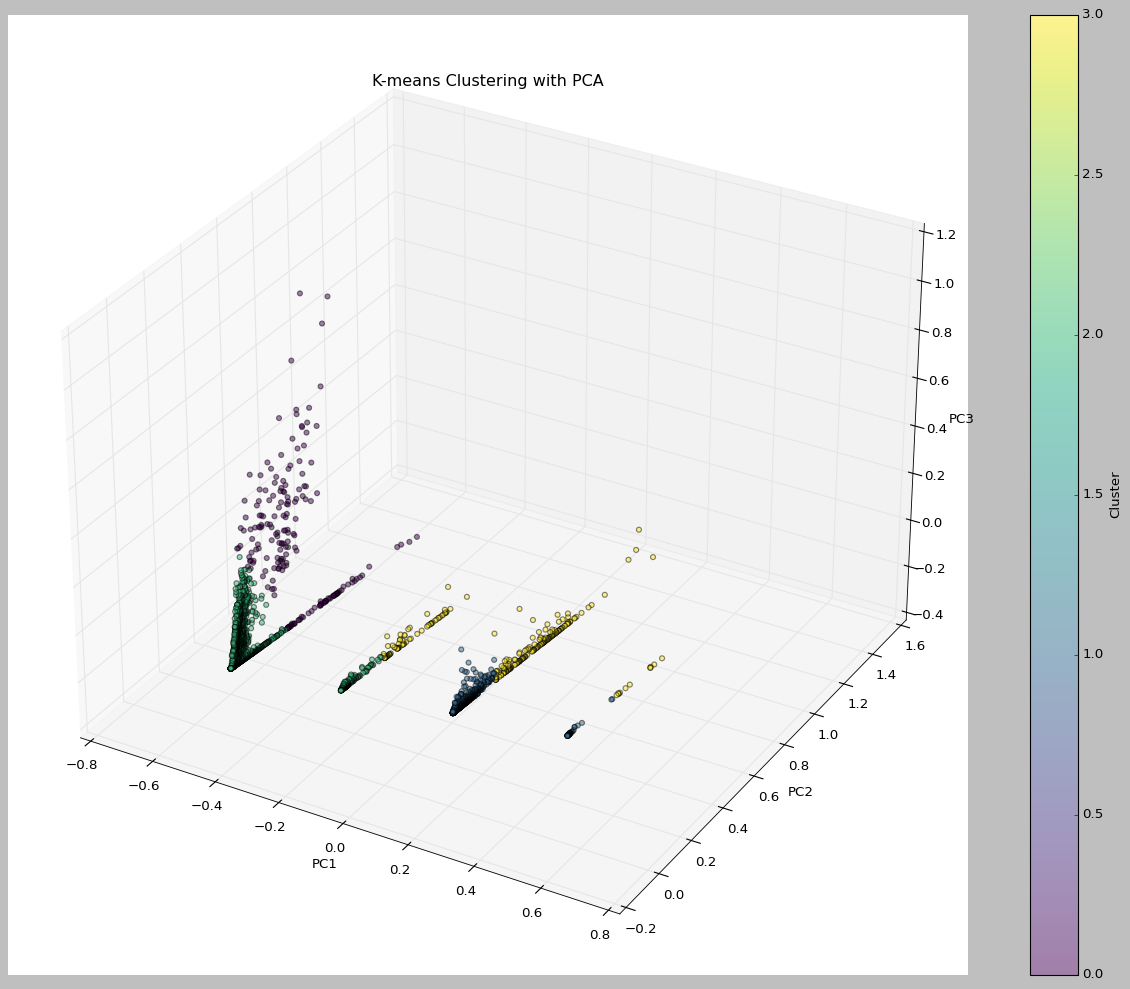

In [32]:
from sklearn.decomposition import PCA

# Reduce to 3 dimensions for visualization
pca = PCA(n_components=3)  
X_pca = pca.fit_transform(X)
labels = kmeans.labels_

# Visualize Clusters
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, ax=ax, label='Cluster')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('K-means Clustering with PCA')
plt.show()

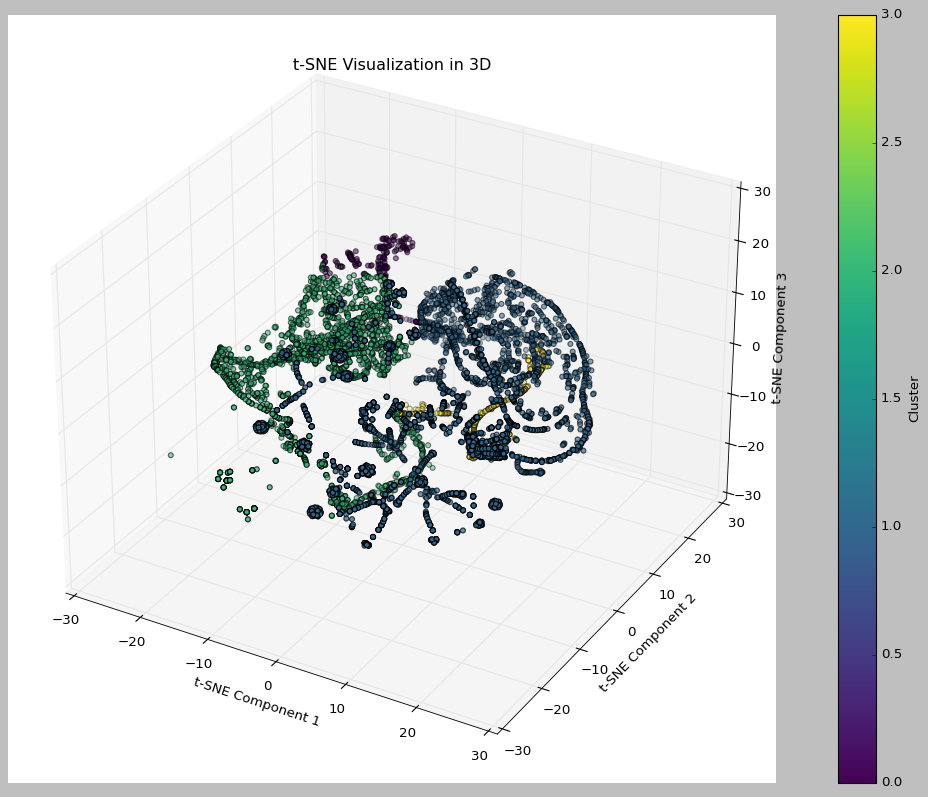

In [33]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(X)

# Visualize t-SNE in 3D
fig = plt.figure(figsize=(20, 12))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], X_tsne[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.title('t-SNE Visualization in 3D')
plt.colorbar(scatter, label='Cluster')
plt.show()

## Analysis of features across clusters

In [34]:
df["cluster"] = kmeans.labels_

df

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,video,529,512,262,432,92,3,1,1,0,2
1,photo,150,0,0,150,0,0,0,0,0,1
2,video,227,236,57,204,21,1,1,0,0,2
3,photo,111,0,0,111,0,0,0,0,0,1
4,photo,213,0,0,204,9,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
7045,photo,89,0,0,89,0,0,0,0,0,1
7046,photo,16,0,0,14,1,0,1,0,0,1
7047,photo,2,0,0,1,1,0,0,0,0,1
7048,photo,351,12,22,349,2,0,0,0,0,1


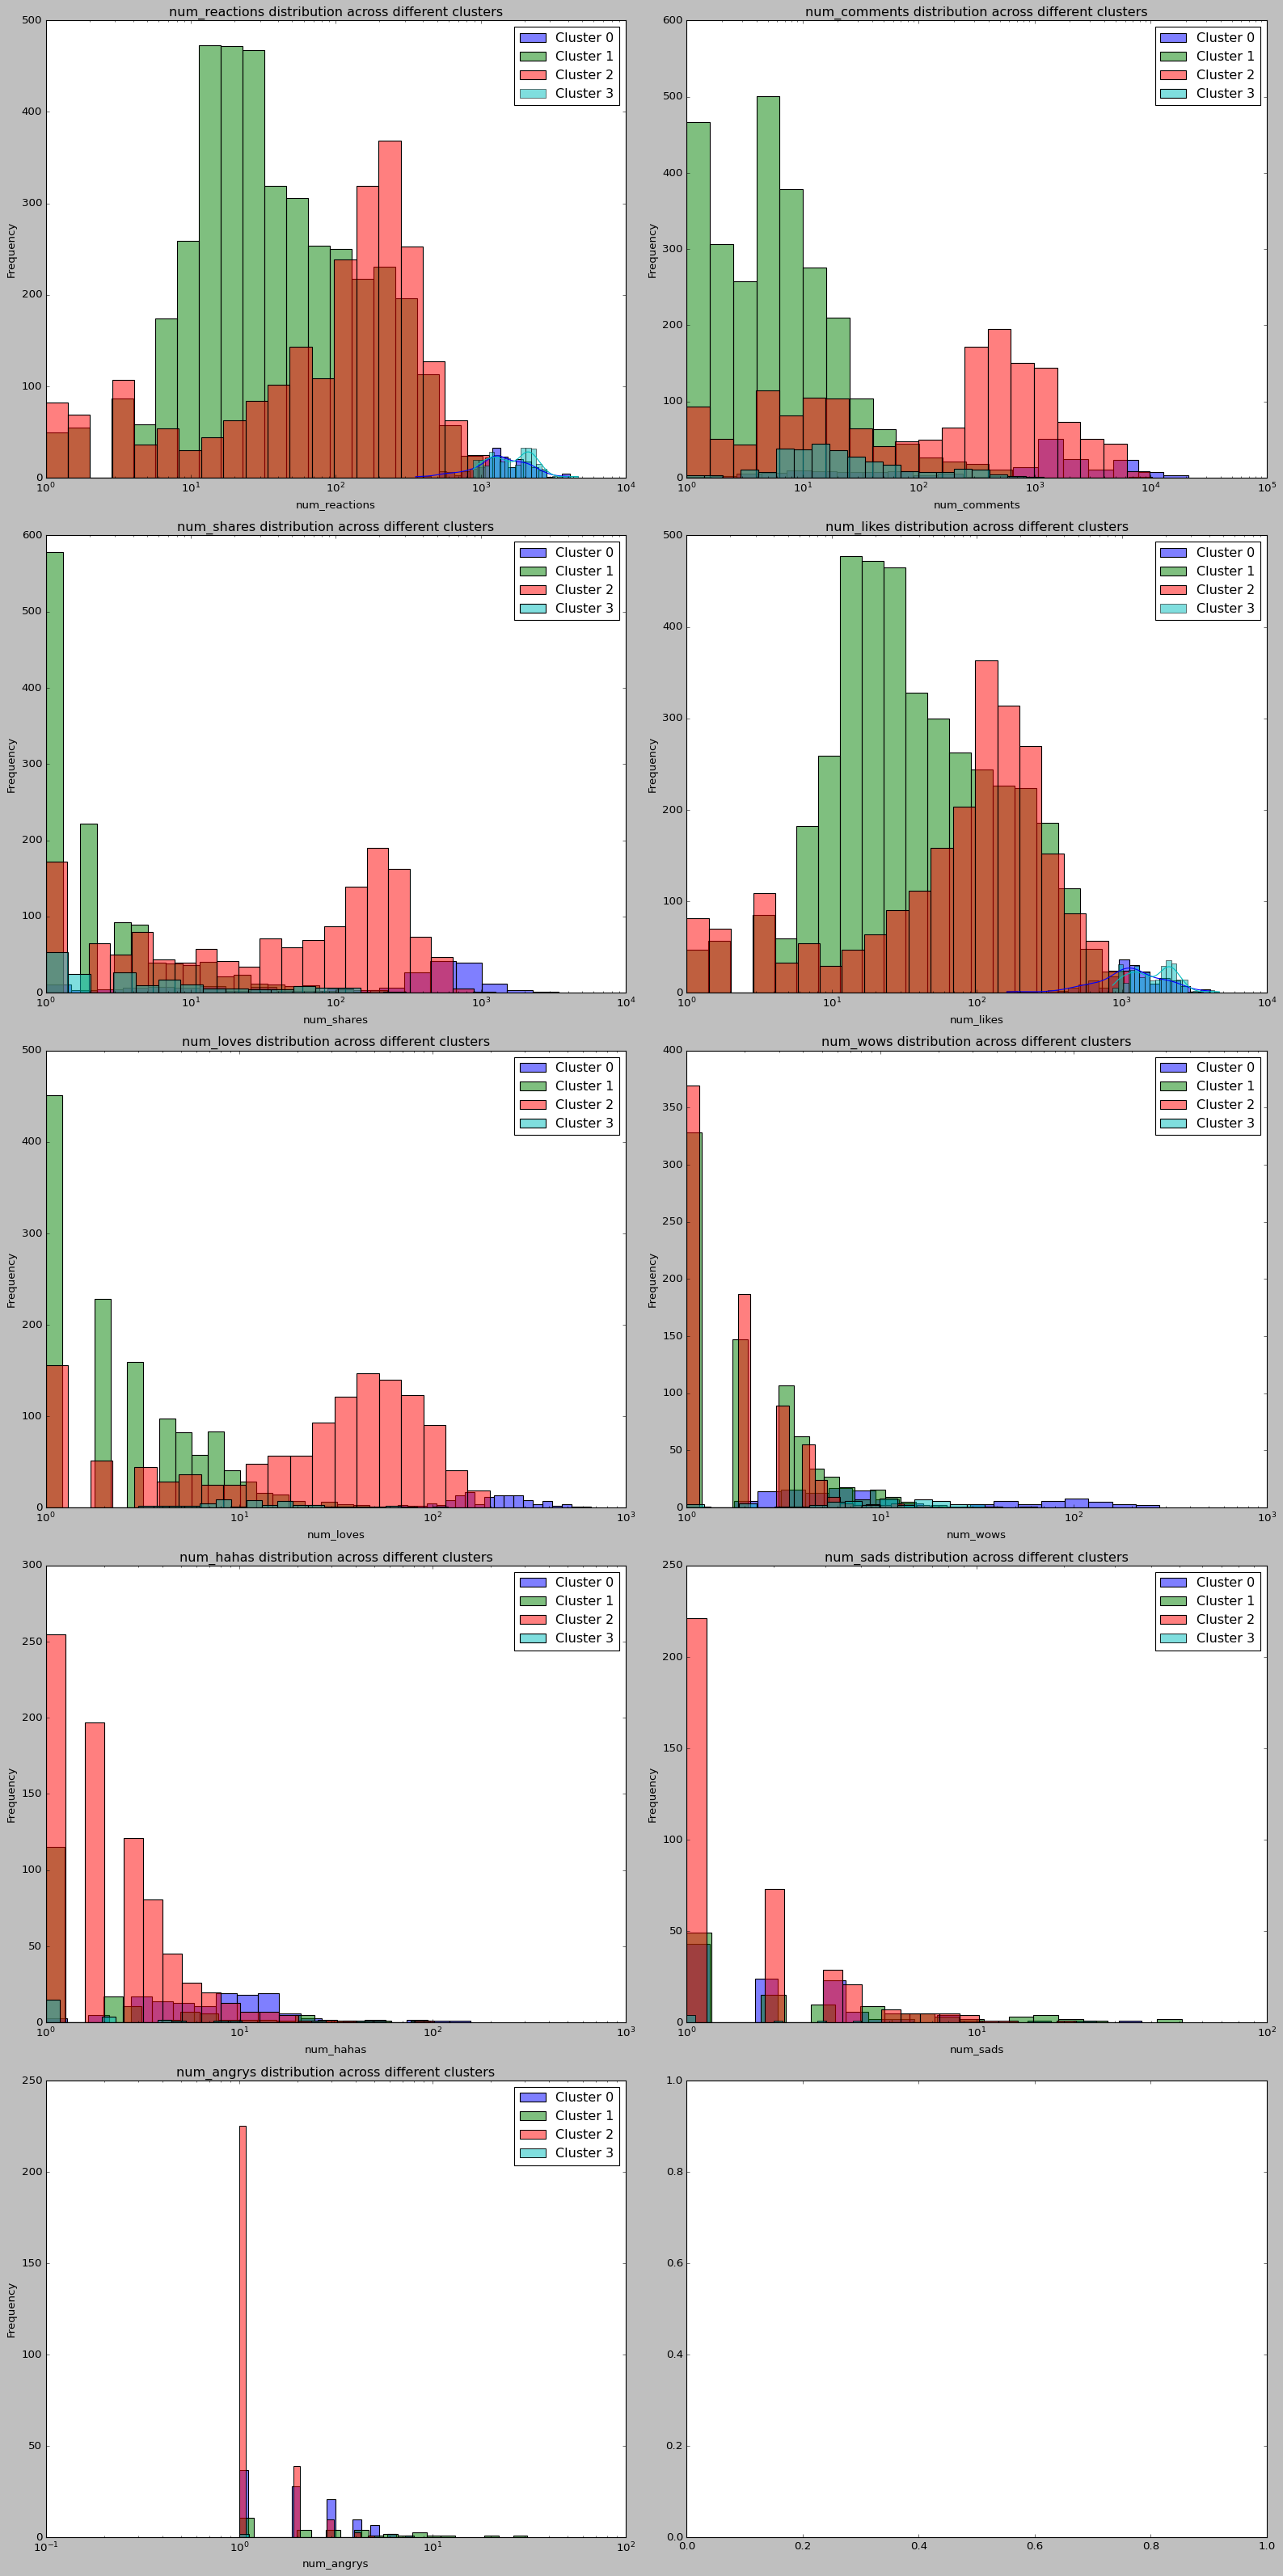

In [35]:
# Numerical Columns
numerical_features = df.columns[1:-1]

# Group data by cluster
grouped = df.groupby('cluster')

# Define the number of rows and columns for subplots
num_rows = (len(numerical_features) + 1) // 2  # Add 1 to handle odd number of clusters
num_cols = 2

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 40))

# Flatten the axes array to simplify indexing
axes = axes.flatten()

# Numerical features histogram
for i, feature in enumerate(df.columns[1:-1]):
    for cluster, group_data in grouped:
        sns.histplot(group_data[feature], label=f'Cluster {cluster}', kde=True, bins=20, log_scale=True, ax=axes[i])
    axes[i].set_title(f'{feature} distribution across different clusters')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend(loc="best")

plt.tight_layout()
plt.show()

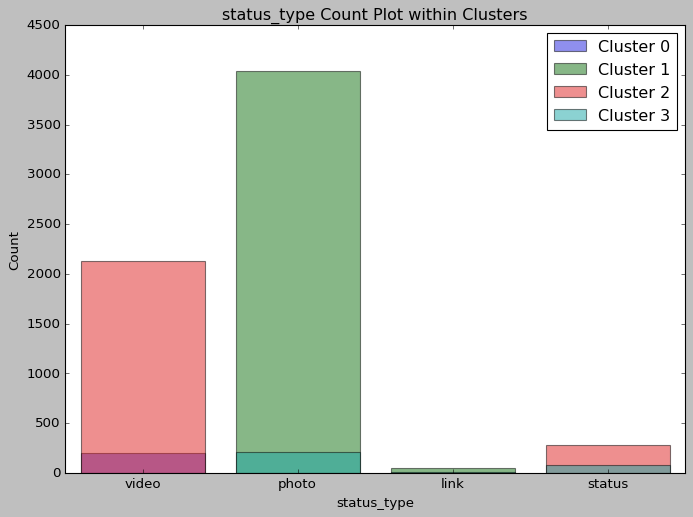

In [36]:
plt.figure(figsize=(10, 7))
for cluster, group_data in grouped:
    sns.countplot(x='status_type', data=group_data, label=f'Cluster {cluster}', alpha=0.5)
plt.title('status_type Count Plot within Clusters')
plt.xlabel('status_type')
plt.ylabel('Count')
plt.legend()
plt.show()